## Analysing and Preparing Data

###Charging Data

In [1]:
# Basic example loading images from the svhn dataset

# Dictionaries
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/DeepLearning_2022/PROJECT/Data/'
results_path = '/content/drive/MyDrive/DeepLearning_2022/PROJECT/Results/'

import csv

# Charge the data

#we read the dataset Sentiment140 for tweet polarity --> 1.6M tweets
data_polarity = pd.read_csv(data_path+'Sentiment140.csv',encoding='utf-8')

#we read the dataset TweetsEmotions for tweet emotions --> 9870 tweets
data_emotion = pd.read_csv(data_path+'TweetsEmotions.csv', index_col = 0)
data_emotion2 = pd.read_csv(data_path+'emotions2.csv', index_col = 0)

#we read the datasets
data_emoji = pd.read_csv(data_path+'emoticons_polarity_emotion_filtered.csv',index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Preparing Data emotion data

In [2]:
data_em = {"Feeling":[]}
data_em = pd.DataFrame(data_em)

data_em["Feeling"]=data_emotion2["Feeling"]
data_em.index.name = 'Tweets'
data_em.reset_index(inplace=True)

In [3]:
print(data_em)

                                                  Tweets  Feeling
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [4]:
print(data_em.columns)

Index(['Tweets', 'Feeling'], dtype='object')


In [5]:

# Again not all types have the same amount of data, dangerous
print(data_em["Feeling"].value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Feeling, dtype: int64


In [6]:
for i in range(len(data_em)):
  if data_em.loc[i,'Feeling']=='sadness':
    data_em.loc[i,'Feeling'] = 'sad'
  elif data_em.loc[i,'Feeling']=='anger':
    data_em.loc[i,'Feeling'] = 'angry'


In [7]:
print(data_em[data_em['Feeling']=='sad'])
print(data_em[data_em['Feeling']=='angry'])
print(data_em[data_em['Feeling']=='fear'])

                                                  Tweets Feeling
0                                i didnt feel humiliated     sad
1      i can go from feeling so hopeless to so damned...     sad
5      ive been feeling a little burdened lately wasn...     sad
10     i feel like i have to make the suffering i m s...     sad
13                    i feel low energy i m just thirsty     sad
...                                                  ...     ...
15988            i feel pathetic because im still single     sad
15991  i have wanted to perhaps convey my feelings of...     sad
15995  i just had a very brief time in the beanbag an...     sad
15996  i am now turning and i feel pathetic that i am...     sad
15999  i know a lot but i feel so stupid because i ca...     sad

[4666 rows x 2 columns]
                                                  Tweets Feeling
2       im grabbing a minute to post i feel greedy wrong   angry
4                                   i am feeling grouchy   angry


In [8]:
data_e = data_emotion[['Tweets','Feeling']]
print(data_e)
print(data_e['Feeling'].value_counts())
data_e = data_e.append(data_em[data_em['Feeling']=='sad'].sample(n=700),ignore_index=True)
data_e = data_e.append(data_em[data_em['Feeling']=='angry'],ignore_index=True)
data_e = data_e.append(data_em[data_em['Feeling']=='fear'],ignore_index=True)
print(data_e)
print(data_e['Feeling'].value_counts())

                                                  Tweets Feeling
Sl no                                                           
1       #1: @fe ed "RT @MirayaDizon1: Time is ticking...   happy
2       #2: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで...   happy
3       #3: @Ris ♡ ed "Happy birthday to one smokin h...   happy
4       #4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...   happy
5       #5: @Madhurima wth u vc♥ ed "Good morning dea...   happy
...                                                  ...     ...
10016  Tweet #85: @Matteo tweeted "@GameSpot @Frannkc...   angry
10017  Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted "@BRATgiirl_ that’...   angry
10018  Tweet #87: @Chowkidar Ricky Sharma tweeted "@M...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry

[10017 rows x 2 columns]
happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [9]:
data_e = data_e.drop(10019)

In [10]:
data_e['Feeling'].value_counts()

happy       3928
sad         3548
angry       3500
fear        2800
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [11]:
from sklearn.utils import shuffle
data_e= shuffle(data_e)

In [12]:
data_e['Feeling'].value_counts()

happy       3928
sad         3548
angry       3500
fear        2800
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [13]:
for i, row in data_e.iterrows():
  if data_e.loc[i, "Feeling"] == "happy" or data_e.loc[i, "Feeling"] == "surprise":
    data_e.loc[i, "Polarity"] = 1
  elif data_e.loc[i, "Feeling"] == "sad" or data_e.loc[i, "Feeling"] == "angry" or data_e.loc[i, "Feeling"] == "fear" or data_e.loc[i, "Feeling"] == "disgust":
    data_e.loc[i, "Polarity"] = 0

data_e.reindex()
data_e_0 = data_e[data_e["Polarity"] == 0].reindex()
data_e_1 = data_e[data_e["Polarity"] == 1].reindex()

In [14]:
data_e["Polarity"].value_counts()

0.0    10485
1.0     4327
Name: Polarity, dtype: int64

In [15]:
for i,row  in data_e_0.iterrows():
  if data_e_0.loc[i, "Feeling"] == "sad":
    data_e_0.loc[i, "Feeling"] = 0
  elif data_e_0.loc[i, "Feeling"] == "angry":
    data_e_0.loc[i, "Feeling"] = 1
  elif data_e_0.loc[i, "Feeling"] == "fear":
    data_e_0.loc[i, "Feeling"] = 2
  elif data_e_0.loc[i, "Feeling"] == "disgust":
    data_e_0.loc[i, "Feeling"] = 3

for i,row  in data_e_1.iterrows():
  if data_e_1.loc[i, "Feeling"] == "happy":
    data_e_1.loc[i, "Feeling"] = 1
  elif data_e_1.loc[i, "Feeling"] == "surprise":
    data_e_1.loc[i, "Feeling"] = 0

In [16]:
data_e_0["Feeling"].value_counts()

print(data_e_0["Feeling"].value_counts())
data_e_0_s = data_e_0[data_e_0["Feeling"] == 0]
data_e_0_a = data_e_0[data_e_0["Feeling"] == 1]
data_e_0_f = data_e_0[data_e_0["Feeling"] == 2]
data_e_0_d = data_e_0[data_e_0["Feeling"] == 3]

data_e_0_s = data_e_0_s.sample(n=650)
data_e_0_a = data_e_0_a.sample(n=650)
data_e_0_f = data_e_0_f.sample(n=650)
data_e_0_d = data_e_0_d.sample(n=637)

data_e_0 = data_e_0_s.append(data_e_0_a,ignore_index=True)
data_e_0 = data_e_0.append(data_e_0_f,ignore_index=True)
data_e_0 = data_e_0.append(data_e_0_d,ignore_index=True)

data_e_0 = shuffle(data_e_0)

print(data_e_0["Feeling"].value_counts())

0    3548
1    3500
2    2800
3     637
Name: Feeling, dtype: int64
0    650
2    650
1    650
3    637
Name: Feeling, dtype: int64


###Preparing Data Emotion Polarity 0

In [17]:
import re
from string import punctuation

all_tweets_e_0 = list()

for t in data_e_0["Tweets"]:
  #t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_e_0.append(t)

all_text = " ".join(all_tweets_e_0)
all_words = all_text.split()

In [18]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 1427), ('ed', 1352), ('to', 1260), ('a', 1152), ('i', 1144), ('and', 1099), ('rt', 835), ('of', 749), ('in', 571), ('that', 549)]


In [19]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [20]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_e_0:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
55142
[2, 667, 2222, 30, 3575, 6, 134, 264, 268, 6, 3576, 3577]


In [21]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_e_0 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_e_0.append(np.array(new))

### Preparing Data Emoji

In [22]:
# Again not all types have the same number of data, dangerous
print(data_emoji)
print(data_emoji["emotion"].value_counts())

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2068  Let’s stop the russian spelling and name it th...   
2069  #Lysychansk after #Putin 🤬 #Лисичанськ #Україн...   
2070  This is really brutal! 🤬\n\nA Ukrainian office...   
2071  Hey #Germany! Are you going to start using #pe...   
2072  Go figure ...India won't condemn Russia for (t...   

                          emoji  polarity  emotion  
0                         ['😭']         0        3  
1                         ['😭']         0        3  
2                         ['😂']         1        1  
3                         ['😓']         0        3  
4                         

In [23]:
data_emoji_0 = data_emoji[data_emoji["polarity"]==0]
data_emoji_0["emotion"].value_counts()

3    496
4    400
6     46
5      5
Name: emotion, dtype: int64

In [24]:
for i,row in data_emoji_0.iterrows():
  if (data_emoji_0.loc[i,"emotion"]==3):
    data_emoji_0.loc[i,"emotion"]=0
  elif (data_emoji_0.loc[i,"emotion"]==4):
    data_emoji_0.loc[i,"emotion"]=1
  elif (data_emoji_0.loc[i,"emotion"]==5):
    data_emoji_0.loc[i,"emotion"]=2
  elif (data_emoji_0.loc[i,"emotion"]==6):
    data_emoji_0.loc[i,"emotion"]=3 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
data_emoji_0["emotion"].value_counts()

print(data_emoji_0["emotion"].value_counts())
data_emoji_0_s = data_emoji_0[data_emoji_0["emotion"] == 0]
data_emoji_0_a = data_emoji_0[data_emoji_0["emotion"] == 1]
data_emoji_0_f = data_emoji_0[data_emoji_0["emotion"] == 2]
data_emoji_0_d = data_emoji_0[data_emoji_0["emotion"] == 3]

data_emoji_0_s = data_emoji_0_s.sample(n=46)
data_emoji_0_a = data_emoji_0_a.sample(n=46)
data_emoji_0_f = data_emoji_0_f.sample(n=5)
data_emoji_0_d = data_emoji_0_d.sample(n=46)

data_emoji_0 = data_emoji_0_s.append(data_emoji_0_a,ignore_index=True)
data_emoji_0 = data_emoji_0.append(data_emoji_0_f,ignore_index=True)
data_emoji_0 = data_emoji_0.append(data_emoji_0_d,ignore_index=True)

data_emoji_0 = shuffle(data_emoji_0)

print(data_emoji_0["emotion"].value_counts())

0    496
1    400
3     46
2      5
Name: emotion, dtype: int64
3    46
1    46
0    46
2     5
Name: emotion, dtype: int64


###Analysing tweets

In [26]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
'''train_x=features[:int(0.8*len(features))]
train_y=data_p_r["polarity"][:int(0.8*len(features))]
valid_x=features[int(0.8*len(features)):int(0.9*len(features))]
valid_y=data_p_r["polarity"][int(0.8*len(features)):int(0.9*len(features))]
test_x=features[int(0.9*len(features)):]
test_y=data_p_r["polarity"][int(0.9*len(features)):]'''

train_x=features_e_0[:int(0.7*len(features_e_0))]
train_y=data_e_0["Feeling"][:int(0.7*len(features_e_0))]
valid_x=features_e_0[int(0.7*len(features_e_0)):int(0.8*len(features_e_0))]
valid_y=data_e_0["Feeling"][int(0.7*len(features_e_0)):int(0.8*len(features_e_0))]
test_x=features_e_0[int(0.8*len(features_e_0)):]
test_y=data_e_0["Feeling"][int(0.8*len(features_e_0)):]
print(len(train_y), len(valid_y), len(test_y))

1810 259 518


##Train the model

In [27]:
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn.functional as F

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), F.one_hot(torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64)))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), F.one_hot(torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64)))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), F.one_hot(torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64)))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  


In [28]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 61])
Sample input: 
 tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0, 5045,    2,   19,  162,  118,    6,  298,  238,  395, 5046,
         5047]])
Sample label size:  torch.Size([1, 4])
Sample label: 
 tensor([[0, 0, 0, 1]])


In [29]:
import torch.nn as nn
 
class SentimentalLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.3)
        
        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 16)
        self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()
        self.softAct = nn.Softmax()
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)

        #stack up the lstm output
        # lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)

        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
       
        
       # out = self.fc3(out)
        sig_out = self.sigmoid(out)
        sig_out = sig_out[:,-1,:]
        

        '''
        print(out.contiguous().view(-1).shape)
       # sig_out = self.softAct(out[:,-1]).view(batch_size, -1)
        sig_out=out.contiguous().view(-1)
        print(sig_out.shape)
        sig_out=sig_out.view(batch_size,-1)
        print(sig_out.shape)'''
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        return (torch.zeros(1, 1, hidden_dim).cuda(),
                torch.zeros(1, 1, hidden_dim).cuda())
        

In [30]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 4
embedding_dim = 400
hidden_dim = 256
n_layers = 1

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(10587, 400)
  (lstm): LSTM(400, 256, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (softAct): Softmax(dim=None)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [31]:
# loss and optimization functions
lr=0.00005

#criterion = nn.CrossEntropyLoss(reduction='sum')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20# 3-4 is approx where I noticed the validation loss stop decreasing

training_loss=[]
validation_loss=[]

counter = 0
print_every = 200
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        # get the output from the model
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output, labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output, labels.float())
                val_losses.append(val_loss.item())
                 
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/20... Step: 200... Loss: 1.369974... Val Loss: 1.385325
Epoch: 1/20... Step: 400... Loss: 1.382880... Val Loss: 1.383829
Epoch: 1/20... Step: 600... Loss: 1.380868... Val Loss: 1.382323
Epoch: 1/20... Step: 800... Loss: 1.370802... Val Loss: 1.380820
Epoch: 1/20... Step: 1000... Loss: 1.370195... Val Loss: 1.379460
Epoch: 1/20... Step: 1200... Loss: 1.367215... Val Loss: 1.376201
Epoch: 1/20... Step: 1400... Loss: 1.381015... Val Loss: 1.373479
Epoch: 1/20... Step: 1600... Loss: 1.397172... Val Loss: 1.369454
Epoch: 1/20... Step: 1800... Loss: 1.402831... Val Loss: 1.364519
Epoch: 2/20... Step: 2000... Loss: 1.383004... Val Loss: 1.357745
Epoch: 2/20... Step: 2200... Loss: 1.389615... Val Loss: 1.347027
Epoch: 2/20... Step: 2400... Loss: 1.331381... Val Loss: 1.333398
Epoch: 2/20... Step: 2600... Loss: 1.343112... Val Loss: 1.314024
Epoch: 2/20... Step: 2800... Loss: 1.344190... Val Loss: 1.301502
Epoch: 2/20... Step: 3000... Loss: 1.262479... Val Loss: 1.280538
Epoch: 2/20...

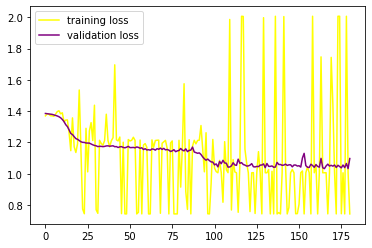

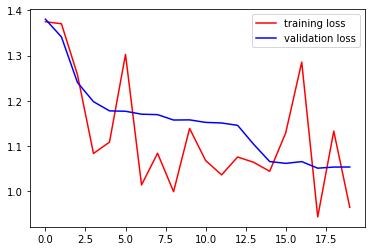

In [32]:
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

t = []
v = []
for i in range(0,20):
  v.append(np.mean(validation_loss[i*7:(i+1)*7]))
  t.append(np.mean(t1[i*7:(i+1)*7]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

In [33]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  highest_value = 0
  high = 0
  counter = 0
  for i in output[0].cpu().detach().numpy():
    if i > highest_value:
      highest_value = i
      high = counter
    counter += 1
  
  pred = [0,0,0,0]
  pred[high] = 1


  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()[0]==1:
    total_s +=1
    if pred[0] == 1:
      num_sad_correct += 1
      num_correct += 1
  if labels[0].numpy()[1]==1:
    total_a +=1
    if pred[1] == 1:
      num_anger_correct += 1
      num_correct += 1
  if labels[0].numpy()[2]==1:
    total_f +=1
    if pred[2] == 1:
      num_fear_correct += 1
      num_correct += 1
  if labels[0].numpy()[3]==1:
    total_d +=1
    if pred[3] == 1:
      num_disgust_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_f = num_fear_correct/total_f
test_acc_a = num_anger_correct/total_a
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))
print("Test disgust accuracy: {:.6f}".format(test_acc_d))

Test loss: 1.144
Test accuracy: 0.519
Test sad accuracy: 0.503546
Test anger accuracy: 0.868217
Test fear accuracy: 0.000000
Test disgust accuracy: 0.747826


##Clean the Ucraine-Russia dataset and use it for negative emotions testing

In [34]:
import re

all_tweets_u = list()
for t in data_emoji_0["tweet"]:
  t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  t = t[2:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_u.append(t)
all_text = " ".join(all_tweets_u)
all_words = all_text.split()

In [35]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_u:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

1277
2280
[1299, 9, 0, 147, 63, 656, 7988, 203, 0, 0, 134, 1, 0, 147, 0, 0, 229, 23, 0, 4636, 0, 0]


In [36]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features.append(np.array(new))

In [37]:
import torch
from torch.utils.data import DataLoader, TensorDataset

test_x_u=features[:int(len(features))]
test_y_u=data_emoji_0["emotion"][:int(len(features))]

#create Tensor Dataset
test_data_u=TensorDataset(torch.FloatTensor(test_x_u).to(torch.int64), F.one_hot(torch.FloatTensor(test_y_u.to_numpy(dtype=np.float64)).to(torch.int64)))

#dataloader
batch_size=64
test_loader_u=DataLoader(test_data_u, batch_size=1, shuffle=True)

In [38]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader_u:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  highest_value = 0
  high = 0
  counter = 0
  for i in output[0].cpu().detach().numpy():
    if i > highest_value:
      highest_value = i
      high = counter
    counter += 1
  
  pred = [0,0,0,0]
  pred[high] = 1


  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()[0]==1:
    total_s +=1
    if pred[0] == 1:
      num_sad_correct += 1
      num_correct += 1
  if labels[0].numpy()[1]==1:
    total_a +=1
    if pred[1] == 1:
      num_anger_correct += 1
      num_correct += 1
  if labels[0].numpy()[2]==1:
    total_f +=1
    if pred[2] == 1:
      num_fear_correct += 1
      num_correct += 1
  if labels[0].numpy()[3]==1:
    total_d +=1
    if pred[3] == 1:
      num_disgust_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_f = num_fear_correct/total_f
test_acc_a = num_anger_correct/total_a
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))
print("Test disgust accuracy: {:.6f}".format(test_acc_d))

Test loss: 1.520
Test accuracy: 0.089
Test sad accuracy: 0.000000
Test anger accuracy: 1.000000
Test fear accuracy: 0.000000
Test disgust accuracy: 0.000000


##Ukraine Training

###Preparing Data Emoji Ukraine

In [39]:
import re
from string import punctuation

all_tweets_emoji_0 = list()

for t in data_emoji_0["tweet"]:
  #t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_emoji_0.append(t)

all_text = " ".join(all_tweets_emoji_0)
all_words = all_text.split()

In [40]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 129), ('to', 81), ('ukraine', 75), ('and', 71), ('in', 59), ('is', 56), ('of', 50), ('russia', 43), ('russian', 30), ('😬', 28)]


In [41]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [42]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_emoji_0:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
3547
[6, 5, 3, 105, 120, 200, 258, 259, 260, 161, 162, 1, 261, 105, 262, 263, 264, 49, 20, 265, 10, 266]


In [43]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_emoji_0 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_emoji_0.append(np.array(new))

###Train Model

In [44]:
train_x=features_emoji_0[:int(0.7*len(features_emoji_0))]
train_y=data_emoji_0["emotion"][:int(0.7*len(features_emoji_0))]
valid_x=features_emoji_0[int(0.7*len(features_emoji_0)):int(0.8*len(features_emoji_0))]
valid_y=data_emoji_0["emotion"][int(0.7*len(features_emoji_0)):int(0.8*len(features_emoji_0))]
test_x=features_emoji_0[int(0.8*len(features_emoji_0)):]
test_y=data_emoji_0["emotion"][int(0.8*len(features_emoji_0)):]
print(len(train_y), len(valid_y), len(test_y))

100 14 29


In [45]:
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), F.one_hot(torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64)))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), F.one_hot(torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64)))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), F.one_hot(torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64)))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

In [46]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 47])
Sample input: 
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0, 472, 473, 250,  31, 474, 475,   7,   1, 117,
         476, 477,   2, 478, 256, 479, 217, 480, 481, 482,  17,   6,  81,  32,
          58, 114,   3, 483, 484]])
Sample label size:  torch.Size([1, 4])
Sample label: 
 tensor([[0, 1, 0, 0]])


In [47]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 4
embedding_dim = 400
hidden_dim = 256
n_layers = 1

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(1245, 400)
  (lstm): LSTM(400, 256, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (softAct): Softmax(dim=None)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [48]:
# loss and optimization functions
lr=0.0005

#criterion = nn.CrossEntropyLoss(reduction='sum')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20# 3-4 is approx where I noticed the validation loss stop decreasing

training_loss=[]
validation_loss=[]

counter = 0
print_every = 200
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        # get the output from the model
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output, labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output, labels.float())
                val_losses.append(val_loss.item())
                 
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


Epoch: 2/20... Step: 200... Loss: 1.024410... Val Loss: 0.984918
Epoch: 4/20... Step: 400... Loss: 0.771484... Val Loss: 0.976681
Epoch: 6/20... Step: 600... Loss: 0.744576... Val Loss: 0.926417
Epoch: 8/20... Step: 800... Loss: 0.743762... Val Loss: 0.985560
Epoch: 10/20... Step: 1000... Loss: 0.751089... Val Loss: 0.940716
Epoch: 12/20... Step: 1200... Loss: 0.743741... Val Loss: 0.928580
Epoch: 14/20... Step: 1400... Loss: 0.743669... Val Loss: 0.908192
Epoch: 16/20... Step: 1600... Loss: 0.743686... Val Loss: 0.941981
Epoch: 18/20... Step: 1800... Loss: 0.827532... Val Loss: 1.018091
Epoch: 20/20... Step: 2000... Loss: 0.743743... Val Loss: 0.950279


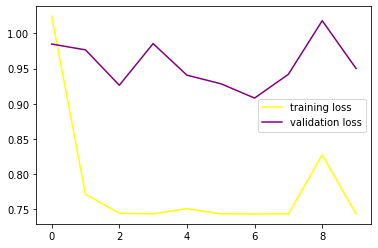

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


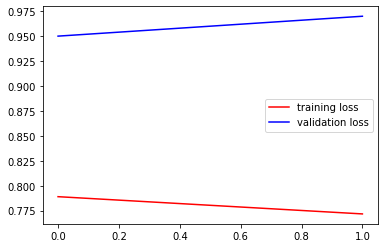

In [49]:
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

t = []
v = []
for i in range(0,20):
  v.append(np.mean(validation_loss[i*7:(i+1)*7]))
  t.append(np.mean(t1[i*7:(i+1)*7]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

###Test Model

In [50]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  highest_value = 0
  high = 0
  counter = 0
  for i in output[0].cpu().detach().numpy():
    if i > highest_value:
      highest_value = i
      high = counter
    counter += 1
  
  pred = [0,0,0,0]
  pred[high] = 1


  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()[0]==1:
    total_s +=1
    if pred[0] == 1:
      num_sad_correct += 1
      num_correct += 1
  if labels[0].numpy()[1]==1:
    total_a +=1
    if pred[1] == 1:
      num_anger_correct += 1
      num_correct += 1
  if labels[0].numpy()[2]==1:
    total_f +=1
    if pred[2] == 1:
      num_fear_correct += 1
      num_correct += 1
  if labels[0].numpy()[3]==1:
    total_d +=1
    if pred[3] == 1:
      num_disgust_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
try:
  test_acc_f = num_fear_correct/total_f
except:
  test_acc_f = 0
test_acc_a = num_anger_correct/total_a
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test disgust accuracy: {:.6f}".format(test_acc_f))
print("Test fear accuracy: {:.6f}".format(test_acc_d))

Test loss: 0.997
Test accuracy: 0.724
Test sad accuracy: 1.000000
Test anger accuracy: 0.750000
Test disgust accuracy: 0.000000
Test fear accuracy: 0.846154


##Ukraine Training Without Disgust

###Preparing Data Emoji Ukraine

In [51]:
data_emoji_0["emotion"].value_counts()

print(data_emoji_0["emotion"].value_counts())
data_emoji_0_s = data_emoji_0[data_emoji_0["emotion"] == 0]
data_emoji_0_a = data_emoji_0[data_emoji_0["emotion"] == 1]
data_emoji_0_f = data_emoji_0[data_emoji_0["emotion"] == 2]
data_emoji_0_d = data_emoji_0[data_emoji_0["emotion"] == 3]

data_emoji_0_s = data_emoji_0_s.sample(n=46)
data_emoji_0_a = data_emoji_0_a.sample(n=46)
data_emoji_0_d = data_emoji_0_d.sample(n=46)

data_emoji_0 = data_emoji_0_s.append(data_emoji_0_a,ignore_index=True)
data_emoji_0 = data_emoji_0.append(data_emoji_0_d,ignore_index=True)

data_emoji_0 = shuffle(data_emoji_0)

print(data_emoji_0["emotion"].value_counts())

3    46
1    46
0    46
2     5
Name: emotion, dtype: int64
1    46
3    46
0    46
Name: emotion, dtype: int64


In [52]:
import re
from string import punctuation

all_tweets_emoji_0 = list()

for t in data_emoji_0["tweet"]:
  #t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_emoji_0.append(t)

all_text = " ".join(all_tweets_emoji_0)
all_words = all_text.split()

In [53]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 127), ('to', 80), ('ukraine', 72), ('and', 70), ('is', 54), ('in', 53), ('of', 48), ('russia', 42), ('russian', 30), ('😬', 28)]


In [54]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [55]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_emoji_0:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
3440
[16, 158, 488, 104, 489, 105, 2, 195, 159, 253, 16, 119, 159, 53, 30, 1, 254, 4, 490, 106, 54, 60, 17, 196, 491, 492, 61, 30, 107, 20, 255, 160, 256, 257, 161, 493, 494]


In [56]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_emoji_0 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_emoji_0.append(np.array(new))

###Train Model

In [57]:
train_x=features_emoji_0[:int(0.7*len(features_emoji_0))]
train_y=data_emoji_0["emotion"][:int(0.7*len(features_emoji_0))]
valid_x=features_emoji_0[int(0.7*len(features_emoji_0)):int(0.8*len(features_emoji_0))]
valid_y=data_emoji_0["emotion"][int(0.7*len(features_emoji_0)):int(0.8*len(features_emoji_0))]
test_x=features_emoji_0[int(0.8*len(features_emoji_0)):]
test_y=data_emoji_0["emotion"][int(0.8*len(features_emoji_0)):]
print(len(train_y), len(valid_y), len(test_y))

96 14 28


In [58]:
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), F.one_hot(torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64)))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), F.one_hot(torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64)))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), F.one_hot(torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64)))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

In [59]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 47])
Sample input: 
 tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 88, 89,
          3, 90, 10, 91, 56, 57, 92, 93, 26, 94, 95]])
Sample label size:  torch.Size([1, 4])
Sample label: 
 tensor([[0, 0, 0, 1]])


In [60]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 4
embedding_dim = 400
hidden_dim = 256
n_layers = 1

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(1195, 400)
  (lstm): LSTM(400, 256, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (softAct): Softmax(dim=None)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [61]:
# loss and optimization functions
lr=0.0005

#criterion = nn.CrossEntropyLoss(reduction='sum')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20# 3-4 is approx where I noticed the validation loss stop decreasing

training_loss=[]
validation_loss=[]

counter = 0
print_every = 200
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        # get the output from the model
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output, labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output, labels.float())
                val_losses.append(val_loss.item())
                 
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


Epoch: 3/20... Step: 200... Loss: 0.792826... Val Loss: 1.132208
Epoch: 5/20... Step: 400... Loss: 0.798885... Val Loss: 0.950961
Epoch: 7/20... Step: 600... Loss: 0.744622... Val Loss: 0.909200
Epoch: 9/20... Step: 800... Loss: 0.743708... Val Loss: 0.888984
Epoch: 11/20... Step: 1000... Loss: 0.743809... Val Loss: 0.912077
Epoch: 13/20... Step: 1200... Loss: 0.749347... Val Loss: 0.897875
Epoch: 15/20... Step: 1400... Loss: 0.744826... Val Loss: 0.880763
Epoch: 17/20... Step: 1600... Loss: 0.832197... Val Loss: 0.918336
Epoch: 19/20... Step: 1800... Loss: 0.743714... Val Loss: 1.054321


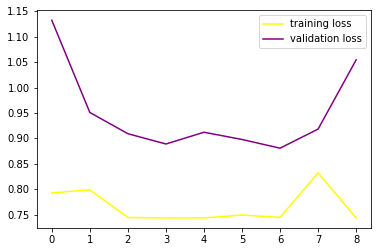

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


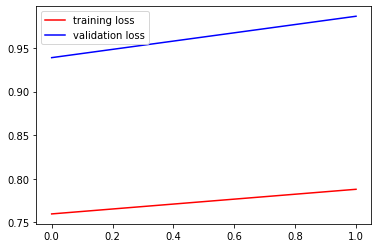

In [62]:
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

t = []
v = []
for i in range(0,20):
  v.append(np.mean(validation_loss[i*7:(i+1)*7]))
  t.append(np.mean(t1[i*7:(i+1)*7]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

###Test Model

In [63]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  highest_value = 0
  high = 0
  counter = 0
  for i in output[0].cpu().detach().numpy():
    if i > highest_value:
      highest_value = i
      high = counter
    counter += 1
  
  pred = [0,0,0,0]
  pred[high] = 1


  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()[0]==1:
    total_s +=1
    if pred[0] == 1:
      num_sad_correct += 1
      num_correct += 1
  if labels[0].numpy()[1]==1:
    total_a +=1
    if pred[1] == 1:
      num_anger_correct += 1
      num_correct += 1
  if labels[0].numpy()[2]==1:
    total_f +=1
    if pred[2] == 1:
      num_fear_correct += 1
      num_correct += 1
  if labels[0].numpy()[3]==1:
    total_d +=1
    if pred[3] == 1:
      num_disgust_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_a = num_anger_correct/total_a
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_d))

Test loss: 0.914
Test accuracy: 0.857
Test sad accuracy: 0.625000
Test anger accuracy: 0.875000
Test fear accuracy: 1.000000
